In [115]:
import sys
sys.path.append('/Users/abadarinath/Applications/anaconda/envs/UdacityNanoCar/lib/python3.5/site-packages')
import numpy as np
import cv2
%matplotlib inline
from matplotlib import pyplot as plt
from os import listdir
from os.path import isfile, join
import pickle

CAMERA_CAL_DIRECTORY = './camera_cal/'


In [108]:
def readImagesFromDir(dirPath,rgb=False):
    allDirfiles = [dirPath+f for f in listdir(dirPath) if isfile(join(dirPath, f))]
    result = []
    for i in range(len(allDirfiles)):
        if rgb:
            bgr_img = cv2.imread(allDirfiles[i])
            b,g,r = cv2.split(bgr_img)       # get b,g,r
            rgb_img = cv2.merge([r,g,b]) 
        else:
            result.append(cv2.imread(allDirfiles[i]))
    return result

In [109]:

def displayImages(imgArray,isGray=False):
    plt.figure()
    for i in range(len(imgArray)):
        if isGray:
            plt.imshow(imgArray[i], cmap='gray')
            plt.show()
        else:
            plt.imshow(imgArray[i])
            plt.show()

In [110]:
def caliberateCamera(cameraCalImgDirectory,debug=False):
    nx = 9
    ny = 6
    allCameraImgs = readImagesFromDir(cameraCalImgDirectory)
    caliberationImgs = allCameraImgs[1:]
    testImg = allCameraImgs[0]

    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((nx*ny,3), np.float32)
    objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.
    img_size = (testImg.shape[1], testImg.shape[0])

    if debug:
        print("caliberation images")
        displayImages(caliberationImgs)
    for img in caliberationImgs:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
        # If found, draw corners
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)
            if debug:
                # Draw and display the corners
                cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
                displayImages([img])
        else:
            print("something went wrong in finding chessboard corners")
    
    
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
    if ret == False:
        print("something went wrong in calibration")
    else:
        dist_pickle = {}
        dist_pickle["mtx"] = mtx
        dist_pickle["dist"] = dist
        pickle.dump( dist_pickle, open( cameraCalImgDirectory+"dist_pickle.p", "wb" ) )
        print("saved to "+cameraCalImgDirectory+"dist_pickle.p")
        dst = cv2.undistort(testImg, mtx, dist, None, mtx)
        print("test image")
        displayImages([testImg])
        print("undistorted image")
        displayImages([dst])

something went wrong in finding chessboard corners
something went wrong in finding chessboard corners
saved to ./camera_cal/dist_pickle.p
test image


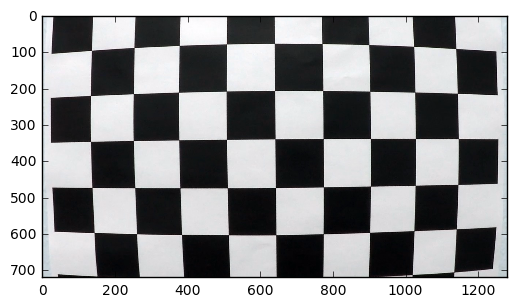

undistorted image


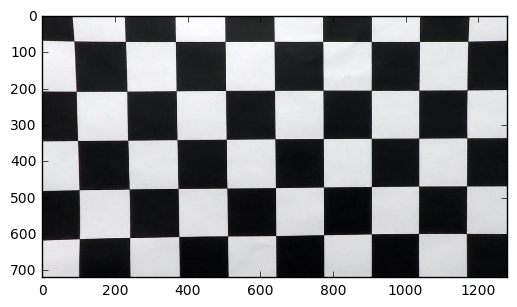

In [111]:
caliberateCamera(CAMERA_CAL_DIRECTORY,False)

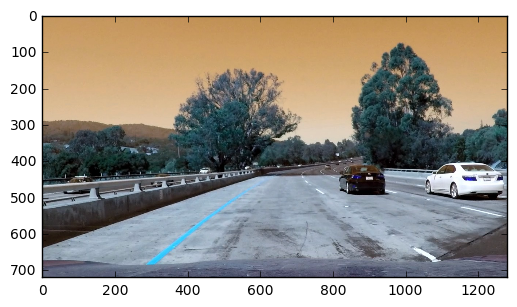

In [125]:
file = open(CAMERA_CAL_DIRECTORY+"dist_pickle.p",'rb')
distortion = pickle.load(file)
file.close()

# testImgs = readImagesFromDir('./test_images/')
img = cv2.imread('./test_images/test1.jpg',3)
plt.imshow(img)
plt.show()

# displayImages(testImgs)

# for img in testImgs:
#     dst = cv2.undistort(img, distortion['mtx'], distortion['dist'], None, distortion['mtx'])
#     print("before image")
#     displayImages([img])
#     print("undistorted image")
#     displayImages([dst])